In [3]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv(os.path.join('..', 'data', 'creditcard.csv'))

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


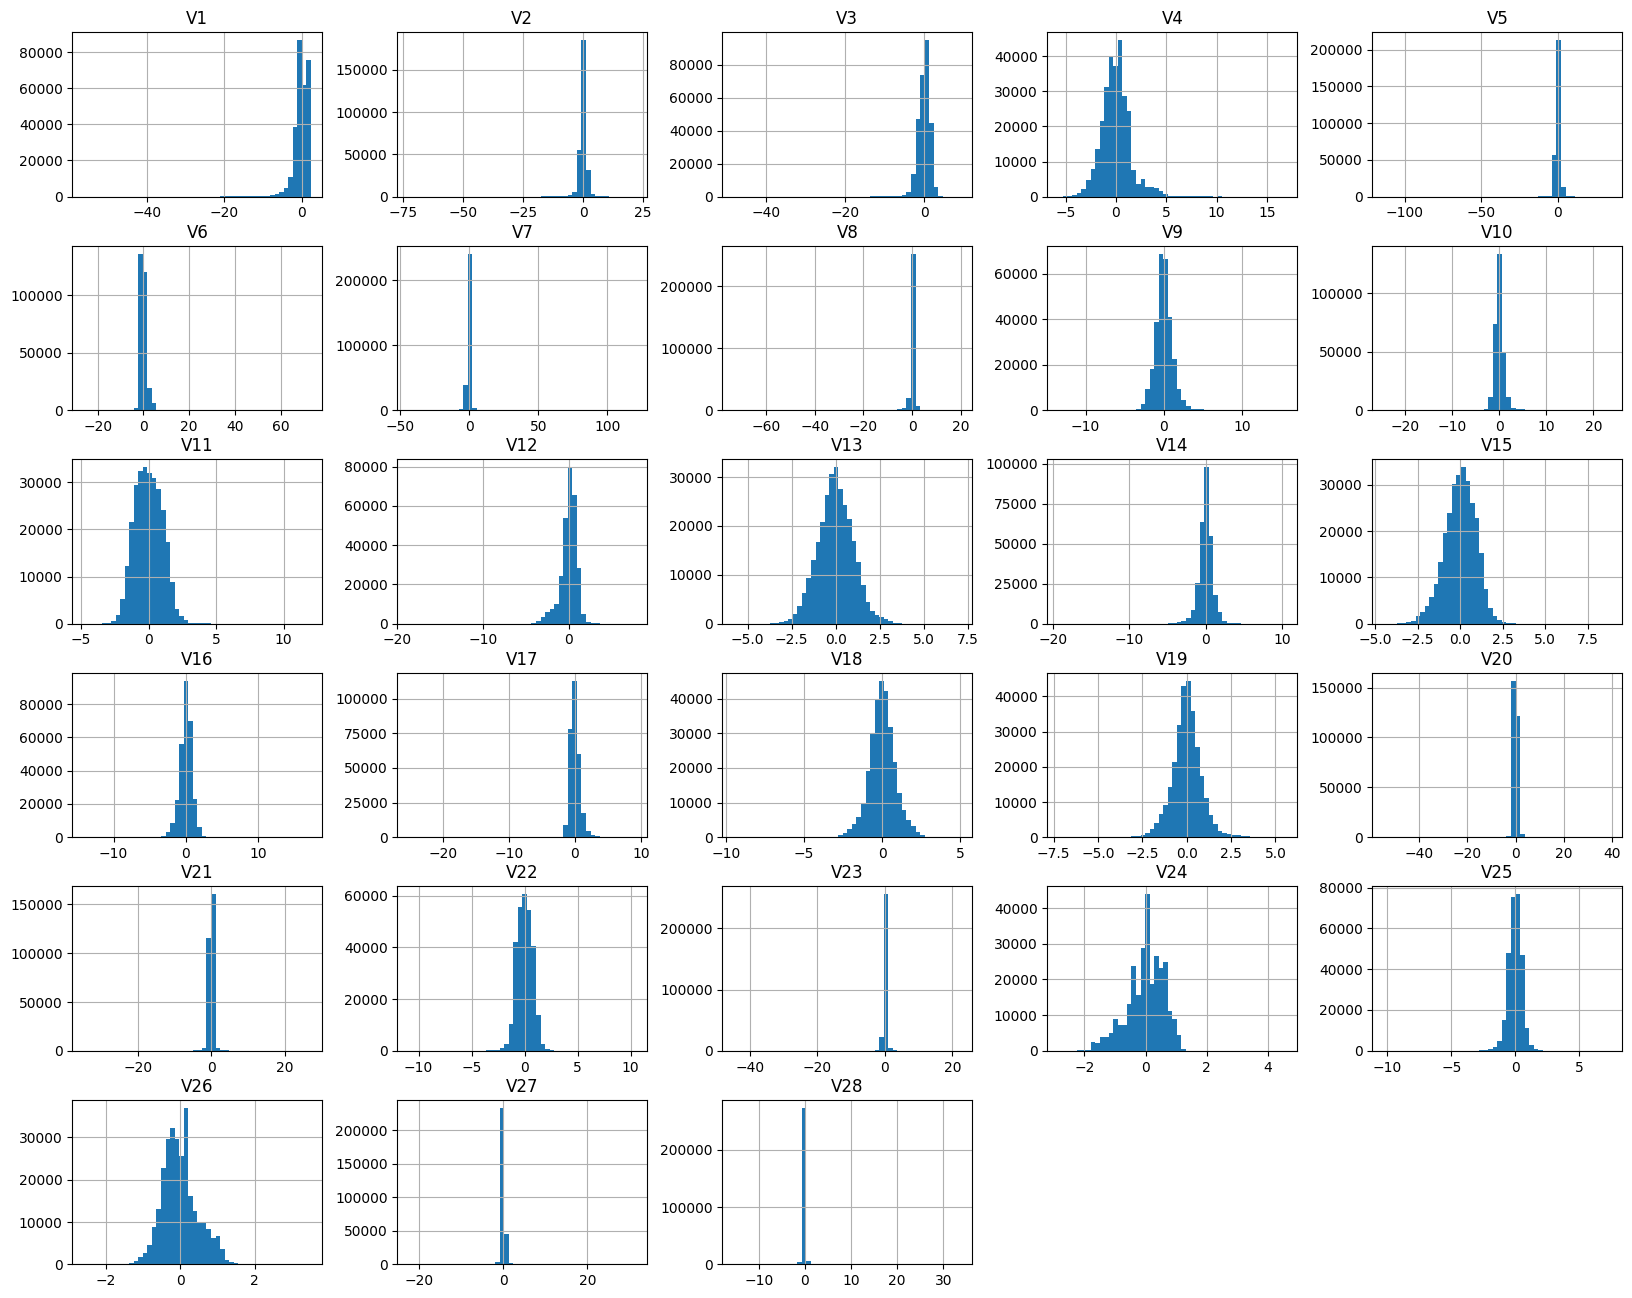

In [7]:
df.iloc[:, 1:-2].hist(figsize=(20, 16), bins=50);

Все фичи нормализованы видимо для сохранности данных пользователей

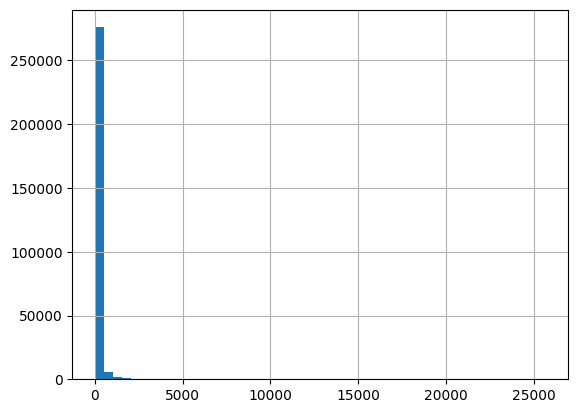

In [8]:
df['Amount'].hist(bins=50);

Вычислим логарифм от суммы транзакции и построим график

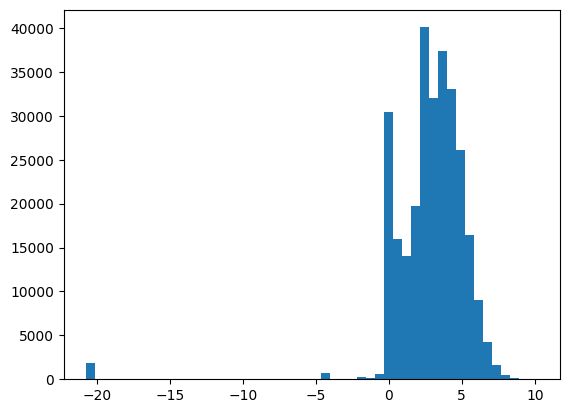

In [9]:
plt.hist(np.log(df['Amount'] + 1e-9), bins=50);

-20 на шкале обозначает нулевые транзакции транзакции

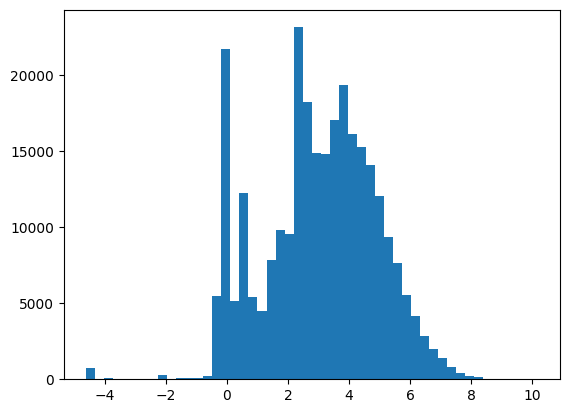

In [10]:
plt.hist(np.log(df[df['Amount'] > 0]['Amount']), bins=50);

In [11]:
df['Amount_log'] = np.log(df['Amount'] + 1e-9)

In [12]:
normal_count, anomaly_count =  df.groupby('Class').count()['Time']

In [13]:
print(f'Normal samples - {normal_count / df.shape[0]}\nAnomaly sample = {anomaly_count / df.shape[0]}')

Normal samples - 0.9982725143693799
Anomaly sample = 0.001727485630620034


Аномальных значений меньше одного процента

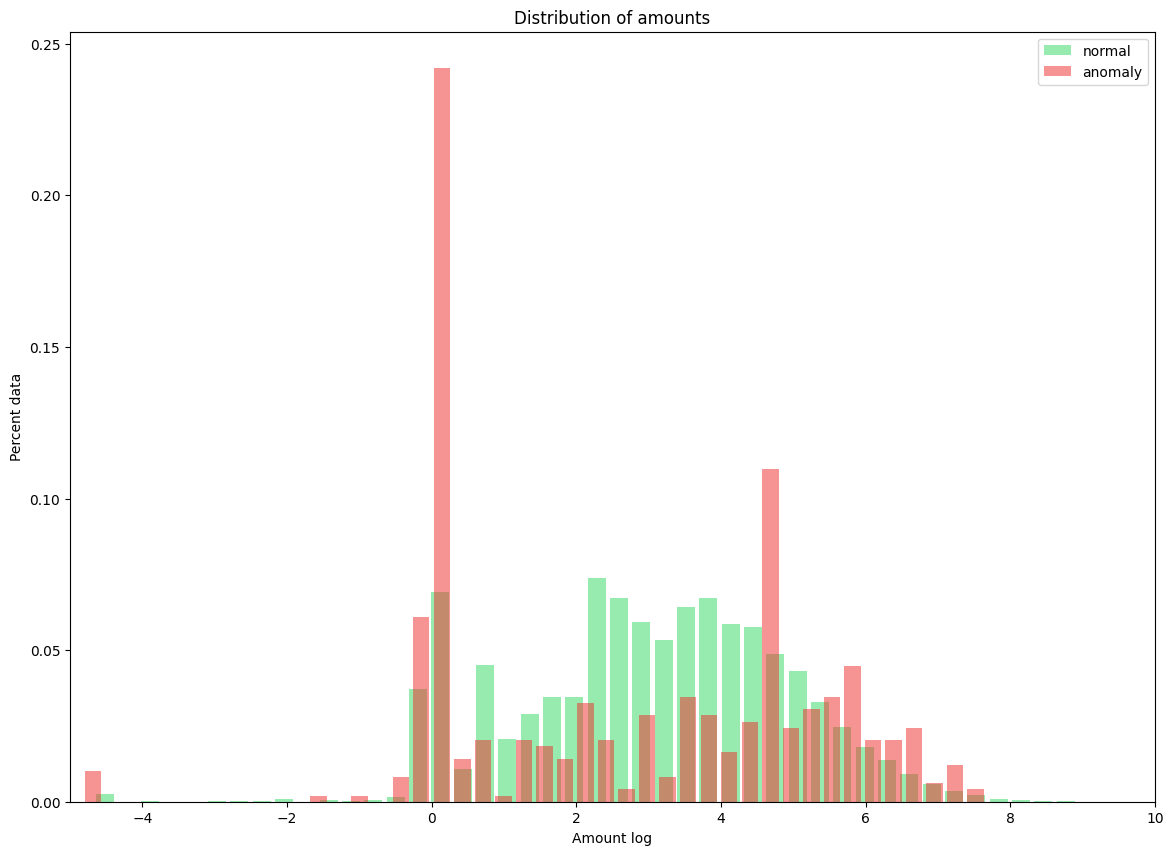

In [14]:
plt.figure(figsize=(14, 10))
plt.xlim([-5, 10])


hist, bins = np.histogram(df[df['Class'] == 0]['Amount_log'], bins=100)
hist = hist / np.sum(hist)

width = .8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='#33D860', label='normal', alpha=.5)

hist, bins = np.histogram(df[df['Class'] == 1]['Amount_log'], bins=100)
hist = hist / np.sum(hist)

width = .8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='#EF2B2B', label='anomaly', alpha=.5)

plt.title('Distribution of amounts')
plt.xlabel('Amount log')
plt.ylabel('Percent data')
plt.legend();

Проверим датасет на NaN

In [17]:
df.isna().sum().sum()

0

В датасете нет отсутствующих значений

Для обучения нам не нужна метка времени и старый amount

In [52]:
df.drop(columns=['Amount', 'Time'], axis=1, inplace=True)

In [54]:
data, target = df.drop(columns=['Class'], axis=1), df['Class']

In [56]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=.2, stratify=target)